# EECCS 4404 / 5327 Assignment - Neural Network

In this exercise, you will implement part of a deep neural network and apply it to the task of hand-written digit recognition. This assignment is adapted from Andrew Ng’s machine learning class on coursera.

**NOTE: MAKE SURE YOU RUN ALL THE CODE BLOCK (INCLUDING THE ONES THAT NO CHANGES ARE NEEDED). WHEN YOU MODIFY THE CODE, MAKE SURE YOU RUN IT AFTER THE MODIFICATION.**

## Liner Algebra and Numpy

Please review the lecture that we overview linear algebra and the numpy library. If you would like to refresh yourself, please go over relavant lecture notes and the numpy overview Jupyter Notebook. You may also find the [summary of linear algebra](https://minireference.com/static/tutorials/linear_algebra_in_4_pages.pdf), [numpy tutorial](https://www.numpy.org/devdocs/user/quickstart.html), and [numpy documentation](http://www.numpy.org/) helpful.

## Dataset

The dataset you will use is taken and modified from the [MNIST digit dataset](http://yann.lecun.com/exdb/mnist/). The dataset consists of 5000 handwritten digit images and the corresponding labels (i.e., correct answers). Each image is 20 pixel by 20 pixel. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The figure below showed some examples from the dataset:

<center><img src="img/digit_dataset.png"/></center>

Please answer the following question (not in this Jupyter file, but in the designated places in **eClass**)

**Q1.** What kind of problem is this?
<ol style="list-style-type: upper-alpha">
  <li>Supervised Learning: Regression</li>
  <li>Supervised Learning: Classification</li>
  <li>Unsupervised Learning: Clustering</li>
  <li>Unsupervised Learning: Dimension Reduction</li>
  <li>Reinforcement Learning</li>
</ol>

**Q2.** What kind of sub-problem is this?
<ol style="list-style-type: upper-alpha">
  <li>Binary</li>
  <li>Multi-Class</li>
  <li>Multi-Label</li>
</ol>

**Q3.** What kind of training sample would you expect for this dataset?
<ol style="list-style-type: upper-alpha">
  <li>Relatively balanced</li>
  <li>skewed dataset</li>
</ol>

## Neural Network

Here is a basic unit/node of a neural network:

<center><img src="img/neuron.png"/></center>

It takes weighted inputs. In this example, $z = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$ (assume $w_1$, $w_2$, and $w_3$ are the weights correspondingly, $b$ is the bias which didn’t show in the figure above). The output is $a = g(z)$ where $g$ is a non-linear activation function. In this assignment, we use the sigmoid function $\sigma(z)$ which is defined as:

<center>$\sigma(z)=\frac{1}{1+e^{-z}}$</center>

A sigmoid function looks like this:

<center><img src="img/sigmoid.png"/></center>

A neural network is composed of these units. There are many such units in each layer, and there are many layers. In this assignment, we will firstly use a 2-layers neural net. The layers are an input layer, a hidden layer and an output layer. Recall that our inputs are pixel values of digit images. The size of each image is 20 by 20.

The training data will be loaded into the variables `train_x` and `train_y` by the function `load_data(training_percentage)`. Let's set the `training_percentage` to 1. You can ignore the `test_x` and `test_y` generated by the load_data function for now. 
The `train_x` contains 5000 vectorized samples, and the `train_y` stores the corresponding labels like 6, 1, 2, etc. Please run the following code as is.

Optional: You can play around with different values for `training_percentage` to see the result. This parameter indicates the percentage of data used for training data, and the rest will be used as testing data. So the range is between 0 and 1. But when you submit this file, make sure it is set to 1.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

from util import load_data, display_digit_image, reshape_Y, display_cost, compute_accuracy

# DO NOT CHANGE ANY PARAMETERS BELOW! 
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(3)

training_percentage = 1

train_x, train_y, test_x, test_y = load_data(training_percentage)

To visualize a sample from the training examples, please run the following code. Feel free to change `index` to see another training example (e.g., 2) (Note: this number is not the label, just the index of the training example).

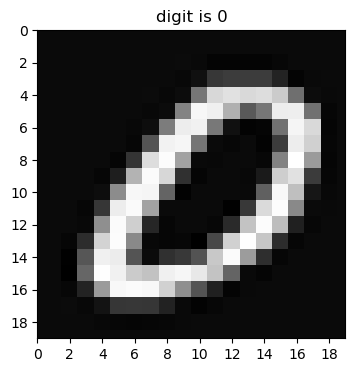

In [2]:
display_digit_image(train_x, train_y, index = 301)

For the hidden layer, we will first include 25 units, and we will play around it later. For the output layer, we will set it to have 10 units. Here is a visualization of the neural network: 

<center><img src="img/neural_network.png"/></center>

Please answer the following question (not in this Jupyter file, but in **eClass**)

**Q4.** Why are there $400$ units in the input layer?
<ol style="list-style-type: upper-alpha">
  <li>Because the images are of size $20$ by $20$. Each node corresponding to a pixel in the image. This results in $400$ input layer units (not counting the extra bias unit which always outputs $1$)</li>
  <li>Because the first layer need to include a lot of neurons so we choose $400$</li>
  <li>The number $400$ is generated randomly, and it can be any number here</li>
</ol>

**Q5.** Why are there $25$ units in the hidden layer?
<ol style="list-style-type: upper-alpha">
  <li>Because $25$ can be divided by $400 \times 10$</li>
  <li>Because $25$ share common divisor of integers with $400$ and $10$ (e.g., $5$)</li>
  <li>The layer does not have to have exactly 25 units. It can be another number such as 24, 26, 27, 29, etc. </li>
</ol>

**Q6.** Why are there $10$ units in the output layer?
<ol style="list-style-type: upper-alpha">
  <li>Because $10$ can be divided by $400 \times 25$</li>
  <li>Because there are $10$ labels corresponding to $10$ digits(i.e., 0, 1, 2, 3, 4, 5, 6, 7, 8, 9)</li>
  <li>The number $10$ is generated randomly, and it can be any number here</li>
</ol>

**Q7.** The activation function in the hidden layer will use the sigmoid function. In class, we mentioned that the activation function of the output layer is dependent on the type of problem. Which activation function is appropriate for classification problems? (check all that apply).
<ol style="list-style-type: upper-alpha">
  <li>Linear activation</li>
  <li>Sigmoid function</li>
  <li>ReLU function</li>
  <li>Leaky ReLU function</li>
  <li>tanh function</li>
  <li>Softmax function</li>
</ol>

The value provided to the input layer will be weighted and passed to the hidden layer. The value at the hidden layer will then go through the activation function and the result will be passed to the output layer. The value will also go through the activation function. At the output layer, the node of the largest value will win and the label represented by the node will be the image’s label. This process is called **feedforward**, and process can be used to **predict** the label given new examples.

We will initialize the weights randomly. the output will be very different from the true label. The cost function is used to evaluate how different it is between the true label and the predicted label. The network will then propagate this information back by calculating the derivatives. The weights of the network will update themselves accordingly. This process is called **backpropagation**. 

## Feedforward

The input data and output can be obtained with (feel free to add code to check the shape of these values):

In [3]:
X = train_x
print("Shape of X:", X.shape)
y = train_y
print("Shape of y:", y.shape)
Y = reshape_Y(y)
print("Shape of Y:", Y.shape)

Shape of X: (400, 5000)
Shape of y: (1, 5000)
Shape of Y: (10, 5000)


The shape is in the form of row by column. For example, for the following matrix:

<center>$\begin{bmatrix}1 & 2 & 3\\4 & 5 & 6\end{bmatrix}$</center>

It can be defined in numpy as:

In [4]:
a = np.array([[1, 2, 3], [4, 5, 6]])

It is a 2 by 3 matrix, and the shape can be obtained with `a.shape`. The result can be printed with:

In [5]:
print(a.shape)

(2, 3)


Before implementing the feedforward process, think about the dimension of the parameters and values. Correct dimensions can help you a lot when debugging the code. Recall that the neural network we will implement is with 3 layers, there are 400 units in the input layer, 25 in the hidden layer, and 10 at the output layer.

Note: It is very important to know the dimensions!!!!!!!!!!!!!!!!!!!!

**Q8-Q23**. Please fill in the dimension
|values|number of rows|number of columns|
|:----:|:-------:|:-------:|
| X (input, which is `train_x)` |         |         |
| y (true label, which is `train_y`) |         |         |
| Y (true label, which is the reshaped `train_y`) |         |         |
| A0 |         |         |
| Z1 |         |         |
| A1 |         |         |
| Z2 |         |         |
| A2 |         |         |

Please fill free to print out the shape of `X`, `y`, and `Y`. The index represents which layer the value belongs to. For example, `Z2` is the linear combination of the values from the values of the previous layer, and `A2` is the value after activation (we choose sigmoid in this assignment). 

Here you can see that the dimension of `Y` and `y` is different. This is because the raw data provided 1, 2, 3, 4 as labels, and the output of the neural net uses one-hot encoding and it is a vector of length 10, with index 0 corresponds to the probability of digit 0, index 1 corresponds to the probability of digit 1, etc. Based on the information provided here and above, please answer the following questions:

**Q24.** Given this converted label:
<center>$\begin{bmatrix}0\\0\\0\\0\\0\\1\\0\\0\\0\\0\end{bmatrix}$</center>
From 0 to 9, which digit is this label corresponding to?

**Q25.** Given this output:
<center>$\begin{bmatrix}0.02\\0.06\\0.9\\0.0004\\0.1\\0.025\\0.062\\0.3\\0.1\\0.12\end{bmatrix}$</center>
which digit is this image mostly represents?

**Q26.**  True or False? The dimensions of `A0` and `X` are the same. This is a coincidence.

**Q27.** True or False? The dimensions of `A2` and `Y` are the same. This is a coincidence.

Now let's take a look at the implementation. Let's initialize the neural network with the following hyperparameter:

In [6]:
layers_dims = [400, 25, 10]

It represents a two-layer neural network. The first layer (i.e., the input layer) has 400 units, the second layer (i.e., the hidden layer) has 25 units, and the third layer (i.e., the output layer) has 10 units. The `initialize_parameters` function initilize the parameters of the neural network.

In [7]:
def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters
    print(parameters)

It returns a dictionary of parameters, with the keywords `W1`, `b1`, `W2` and `b2`. The `W*` represents the weights, and the `b*` is the bias.

Given the input `A_prev` from the previous layer, and the parameters `W` and `b`, the values at the current layer is calculated as follows:

$$Z = WA_{prev} + b$$
$$A = sigmoid(Z)$$

Please complete the sigmoid function (please put your code in between the start code and end code here, and delete the `pass`)

In [8]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    """
    ### START CODE HERE ###
    return 1 / (1 + np.exp(-Z))
    ### END CODE HERE ###  
    
   

You can check the correctness of your implementation by visualizing the function with the code below

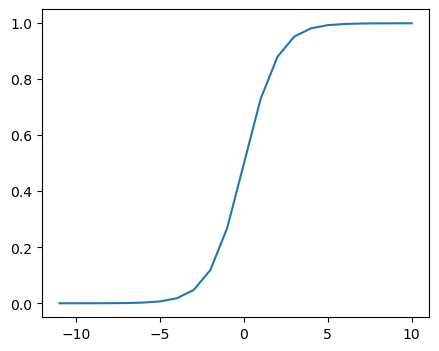

In [9]:
sigmoid_x = np.arange(-11., 11.)
sigmoid_y = sigmoid(sigmoid_x)
plt.plot(sigmoid_x, sigmoid_y)
plt.show()

Please complete the sigmoid function (please put your code in between the start code and end code here). *Hint: you can use the `sigmoid` function you implemented.*

In [10]:
def linear_activation_forward(A_prev, W, b):
    """
    Implement the forward propagation for one layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the result of linear calculation
    A -- the output of the activation function, also called the post-activation value 
    """
    ### START CODE HERE ###
    Z = np.matmul(W, A_prev) + b
    A = sigmoid(Z)
    ### END CODE HERE ###    
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    assert(A.shape == (W.shape[0], A_prev.shape[1]))

    return Z, A

Here is the `feedforward` function and the `predict` function that is implemented for you.

In [11]:
def feedforward(X, parameters):
    """
    Implement forward propagation. The activation functions are all sigmoid functions.
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters(layer_dims)
    
    Returns:
    AL -- last post-activation value
    caches -- a python dictionary containing "a1", "z2", "a2", "z3", ...; they are stored for computing the backward pass efficiently
    """

    caches = {}
    caches["A0"] = X
    A = X
    L = len(parameters) // 2                  # number of layers (excluding input layer, including output layer) in the neural network
    
    for l in range(1, L + 1):
        A_prev = A 
        Z, A = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)])
        caches["Z" + str(l)] = Z
        caches["A" + str(l)] = A
    
    assert(A.shape == (10, X.shape[1]))
            
    return A, caches

In [12]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (0, 1, 2, 3 ...)
    """
    A2, cache = feedforward(X, parameters)
    predictions = np.argmax(A2, axis = 0)
    np.reshape(predictions, (1, np.shape(predictions)[0]))
    
    return predictions

The values are cached so that the calculations in the backpropogation process can be more efficient.

If you implement the above code correctly, this following chunk of code should output `[0.49058414 0.49043377 0.49029028 ... 0.49059123 0.49059543 0.49074616]`.

In [13]:
print(feedforward(train_x, initialize_parameters(layers_dims))[1]["A2"][0])

[0.49058414 0.49043377 0.49029028 ... 0.49059123 0.49059543 0.49074616]


## Backpropagation

The cost function is calculated as follows (this might look a little bit different to the vectorization form of logistic regression we have in the class. This is because the output in logistic regression is a vector as we only expect 1 predicted value in each example, but it is a matrix in neural network):

<center>$$J(W, b)=\sum_{n=1}^{m} \frac{1}{m}[-Y \circ \log(AL)-(1-Y) \circ \log(1-AL)]$$</center>

where `AL` is the value of the output layer (in our neural network, it is `A2`), $\circ$ is element-wise multiplication

Please implement the cost function (please put your code in between the start code and end code here, and delete the `pass`)

In [14]:
def compute_cost(AL, Y):
    """
    Implement the cost function.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (10, number of examples)
    Y -- true "label" vector after reshape by reshape_Y function, shape (10, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute cost.
    ### START CODE HERE ###
    cost = -np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL)) / m
    ### END CODE HERE ###  

    cost = np.squeeze(cost)     # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

Here is how to update the weights. The main idea is to calculate the “differences” (which is actually derivative. You can perceive it as a way to evaluate as difference, but it is not just a simple subtraction in quantity) of the current value to the target value (which is denoted as `dZ*`, where * is the layer index), and thus figure out the differences (denoted as `dW*` and `db*`)  between the current weights and the ideal value of weights, and update the weights accordingly. And we will work backwards, which is from the output layer to the input layer.

The weight and bias at each layer are updated with:

<center>$$W_i=W_i-\alpha \frac{\partial J}{\partial W_i}$$</center>
<center>$$b_i=b_i-\alpha \frac{\partial J}{\partial b_i}$$</center>

where $i$ is the layer index, and $\alpha$ is the learning rate. Here are the formulas to calculate the partial derivative.

<center>$$\frac{\partial J}{\partial W_i} =\frac{1}{m} \frac{\partial J}{\partial Z_{i}} A_{i-1}^T$$</center>
<center>$$\frac{\partial J}{\partial b_i} =\frac{1}{m} \frac{\partial J}{\partial Z_{i}} \vec{1}$$</center>

The partial derivative with respect to $b_i$ simply get the mean of each row of $\frac{\partial J}{\partial Z_{i}}$, and there could be more than one way to achieve it.

**Q28.** In the formula of $\frac{\partial J}{\partial W_i}$, what is the operation between $\frac{1}{m}$ and $\frac{\partial J}{\partial Z_i} A_{i-1}^T$? *Hint: $\frac{1}{m}$ is a scalar, and $\frac{\partial J}{\partial Z_i} A_{i-1}^T$ is a matrix*
<ol style="list-style-type: upper-alpha">
  <li>scalar multiplication</li>
  <li>matrix multiplication (multiplication between two matrices/vectors)</li>
  <li>element-wise multiplication</li>
</ol>

**Q29.** In the formula of $\frac{\partial J}{\partial W_i}$, what is the operation between $\frac{1}{m} \frac{\partial J}{\partial Z_i}$ and $A_{i-1}^T$? *Hint: $\frac{1}{m} \frac{\partial J}{\partial Z_i}$ is a matrix, and $A_{i-1}^T$ is also a matrix*
<ol style="list-style-type: upper-alpha">
  <li>scalar multiplication</li>
  <li>matrix multiplication (multiplication between two matrices/vectors)</li>
  <li>element-wise multiplication</li>
</ol>

**Q30.** In the formula of $\frac{\partial J}{\partial b_i}$, what is the operation between $\frac{1}{m}$ and $\frac{\partial J}{\partial Z_i} \vec{1}$? *Hint: $\frac{1}{m}$ is a scalar, and $\frac{\partial J}{\partial Z_i} \vec{1}$ is also a scalar*
<ol style="list-style-type: upper-alpha">
  <li>scalar multiplication</li>
  <li>matrix multiplication (multiplication between two matrices/vectors)</li>
  <li>element-wise multiplication</li>
</ol>

**Q31.** In the formula of $\frac{\partial J}{\partial b_i}$, what is the operation between $\frac{1}{m} \frac{\partial J}{\partial Z_i}$ and $\vec{1}$? *Hint: $\frac{1}{m} \frac{\partial J}{\partial Z_i}$ is a matrix, and $\vec{1}$ is also a vector*
<ol style="list-style-type: upper-alpha">
  <li>scalar multiplication</li>
  <li>matrix multiplication (multiplication between two matrices/vectors)</li>
  <li>element-wise multiplication</li>
</ol>

In the partial derivative formulas, you may observe that the key is to find:

<center>$$\frac{\partial J}{\partial Z_i}$$</center>

At the output layer, the $\frac{\partial{J}}{\partial{Z_2}}$ is calculated as:

<center>$$\frac{\partial{J}}{\partial{Z_2}}=A_2-Y$$</center>

At the hidden layer, $\frac{\partial{J}}{\partial{Z_1}}$ are calculated as follows

<center>$$\frac{\partial{J}}{\partial{Z_1}}=(W_2^T\frac{\partial{J}}{\partial{Z_2}}) \circ \frac{\partial{sigmoid(Z_1)}}{\partial{Z_1}}$$</center>

where $\circ$ represents element-wise multiplication.

**Q32.** Notice that we did not mention $\frac{\partial{J}}{\partial{Z_0}}$, why is that (you can assume $Z_0$ is $X$)?
<ol style="list-style-type: upper-alpha">
  <li>$\frac{\partial{J}}{\partial{Z_0}}$ should exist, but it is just not used in the calculation later. So this value is excluded</li>
  <li>The calculation of $\frac{\partial{J}}{\partial{Z_0}}$ is the same as $\frac{\partial{J}}{\partial{Z_1}}$. There is no need to repeat.</li>
  <li>If we are going to calculate $\frac{\partial{J}}{\partial{Z_0}}$, that will be the difference between the desired value and the actual value we got. The actual value is the image, and we cannot modify the input. So there is no need to calculate $\frac{\partial{J}}{\partial{Z_0}}$</li>
  <li>$\frac{\partial{J}}{\partial{Z_0}}$ should be there, and the calculation is different from $\frac{\partial{J}}{\partial{Z_1}}$. The course staff made a mistake and the formula should be there.</li>
</ol>

Now let's generalize the formula to neural network with artibrary number of layers. 

**Q33.** For the output layer of an n-layer neural network:
<ol style="list-style-type: upper-alpha">
  <li>$\frac{\partial{J}}{\partial{Z_n}}=A_n-Y$</li>
  <li>$\frac{\partial{J}}{\partial{Z_n}}=Y+A_n$</li>
  <li>$\frac{\partial{J}}{\partial{Z_n}}=Y-A_n$</li>
</ol>

**Q34.** For the hidden layer of an n-layer neural network:
<ol style="list-style-type: upper-alpha">
  <li>$\frac{\partial{J}}{\partial{Z_i}}=(W_{i+1}^T\frac{\partial{J}}{\partial{Z_{i+1}}}) \circ \frac{\partial{sigmoid(Z_i)}}{\partial{Z_i}}$</li>
  <li>$\frac{\partial{J}}{\partial{Z_i}}=(W_i^T\frac{\partial{J}}{\partial{Z_{i}}}) \circ \frac{\partial{sigmoid(Z_i)}}{\partial{Z_i}}$</li>
  <li>$\frac{\partial{J}}{\partial{Z_i}}=(W_{i+1}^T\frac{\partial{J}}{\partial{Z_{i+1}}}) \circ \frac{\partial{sigmoid(Z_{i+1})}}{\partial{Z_{i+1}}}$</li>
</ol>

Now let's implement backpropagation. Note that in the program, we represent $\frac{\partial{J}}{\partial{Z_i}}$ as `dZi`, $\frac{\partial{J}}{\partial{W_i}}$ as `dWi`. First, let's implement the gradient of a sigmoid function. Note that $\frac{\partial{sigmoid(Z_i)}}{\partial{Z_i}}=sigmoid(Z_i) \circ (1-sigmoid(Z_i))$

In [15]:
def sigmoid_gradient(Z):
    """
    Implements the inverse of the sigmoid
    
    Arguments:
    Z -- numpy array
    
    Returns:
     -- output of inverse of sigmoid(Z), same shape as Z
    """    
    ### START CODE HERE ###
    return sigmoid(Z) * (1 - sigmoid(Z))
    ### END CODE HERE ###
    
   

In [28]:
def backpropagation(AL, Y, parameters, caches, layers_dims):
    """
    Implement the backward propagation. This is the function that calculates the partial derivatives dWi. This function also caches dZi in the dictionary grad.
     
    Arguments:
    AL -- probability vector, output of the forward propagation
    Y -- true "label" vector after reshaping by reshape_Y
    caches -- output of the feedforward function
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dZ" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(layers_dims)
    m = AL.shape[1]

    # Initializing the backpropagation, by calculating the dZi of the last layer and save it to grads with the key "dZ*" where * is the index of the layer
    # pleaes do not hard code to 3 here 
    ### START CODE HERE ###
    grads["dZ" + str(L)]  = AL - Y
    ### END CODE HERE ###
    
    for l in reversed(range(1, L)):
        ### START CODE HERE ###
        grads["dW" + str(l)] = np.matmul(grads["dZ" + str(l + 1)], caches["A" + str(l-1)].T) / m
        grads["db" + str(l)] = np.matmul(grads["dZ" + str(l + 1)], np.ones((1, caches["A" + str(l)].shape[1])).T) / m
        if l != 1:
            grads["dZ" + str(l)] = np.matmul(parameters["W" + str(l)].T, grads["dZ" + str(l + 1)]) * sigmoid_gradient(caches["Z" + str(l-1)])
        ### END CODE HERE ###

    return grads

Note: It is **very likely** that you make a mistake in the code below. Be very careful of the range of the loop. If you set the range wrong, you will not be able to get a trained model with low cost (e.g., less than 1).

In [29]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of backpropagation
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
                  
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ###
    for l in range(1, L + 1):
            parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)]
            parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]
    
    ### END CODE HERE ###
    
    return parameters

## Put it together

Implement the required lines below and put together the functions you have implemented above.

In [30]:
def deep_NN(X, Y, layers_dims, learning_rate, num_iterations, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->SIGMOID]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector, of shape (10, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints all the cost
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    costs = []                         # keep track of the cost
    
    # Parameters initialization.
    parameters = initialize_parameters(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation:
        ### START CODE HERE ###
        AL, caches = feedforward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ###
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ###
        grads = backpropagation(AL, Y, parameters, caches, layers_dims)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ###
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
        
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))
        
        costs.append(cost)
    
    return parameters, costs

Now let's train the neural network by the the code below. NOTE: the training do need some time. If you what know which iteration it is as, you can set `print_cost=True`, but do not modify the code otherwise.

Optional: you can try different values of `training_percentage`, `learning_rate`, `num_iterations`, or even using a neural network with a different structure by modifying `layers_dims` after you complete the assignment and see whether you will get a more accurate modell, or less accurate model. You are very welcome to share your finding on the discussion forum. But when you submit your assignment, please submit it with the default values:
```
training_percentage = 1
layers_dims = [400, 25, 10]
learning_rate = 0.5
num_iterations = 2000
```

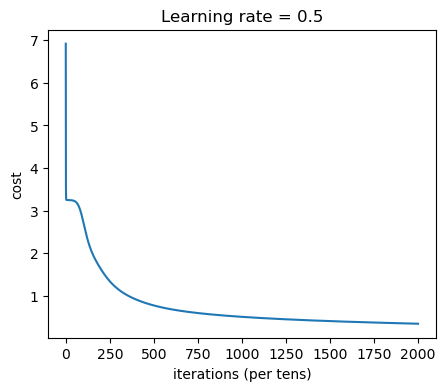

the accuracy on the training set is: 0.9554


In [32]:
# hyperparameters
training_percentage = 1
layers_dims = [400, 25, 10]
learning_rate = 0.5
num_iterations = 2000

# load data and train
train_x, train_y, test_x, test_y = load_data(training_percentage) # load again just in case it got modified while you play around with the code
parameters, costs = deep_NN(train_x, reshape_Y(train_y), layers_dims, learning_rate, num_iterations, print_cost=False)

# show results
display_cost(costs, learning_rate, figure_index=2)
train_set_predictions = predict(parameters, train_x)
train_set_accuracy = compute_accuracy(train_set_predictions, train_y)
print("the accuracy on the training set is:", train_set_accuracy)

**Q35.** What is the accuracy you obtained above?

**Q36.** Please copy and paste your figure (or take a screenshot) to the answersheet using "Insert or edit image". 

**Q37**. Please submit the Jupyter notebook that you have completed. Do not clear the output! To get the Jupyter notebook, Click File -> Download. To upload the jupyter file, you can drag and drop it to the box in the answer sheet in eClass.